In [15]:
function f(x,y,z)
    return x^2+y^2+z^2
end

f (generic function with 1 method)

In [16]:
function Flatt(N)
    F=0
    for ix=0:N-1
        x=ix/N
        for iy=0:N-1
            y=iy/N
            for iz=0:N-1
                z=iz/N
                    F+=(f(ix/N,iy/N,iz/N)+f((ix+1)/N,iy/N,iz/N)+f(ix/N,(iy+1)/N,iz/N)+f((ix+1)/N,(iy+1)/N,iz/N)+f(ix/N,iy/N,(iz+1)/N)+f((ix+1)/N,iy/N,(iz+1)/N)+f(ix/N,(iy+1)/N,(iz+1)/N)+f((ix+1)/N,(iy+1)/N,(iz+1)/N))/8
            end
        end
    end
    F/=N^3
    return F
end

Flatt (generic function with 1 method)

In [17]:
function Fmc(N)
    F=0
    for ix=1:N^3
        x=rand()
        y=rand()
        z=rand()
        F+=f(x,y,z)
    end
    F/=N^3
    return F
end

Fmc (generic function with 1 method)

In [18]:
using Plots

In [19]:
Ns=[N for N in 1:100]

100-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
   ⋮
  92
  93
  94
  95
  96
  97
  98
  99
 100

In [20]:
deltalatt = [abs(Flatt(N)-1) for N in Ns]

100-element Vector{Float64}:
 0.5
 0.125
 0.05555555555555558
 0.03125
 0.020000000000000018
 0.013888888888889062
 0.010204081632651407
 0.0078125
 0.006172839506172423
 0.004999999999999227
 ⋮
 5.907372396918298e-5
 5.7810151453008274e-5
 5.6586690820426e-5
 5.540166206841057e-5
 5.425347183529716e-5
 5.314061004235704e-5
 5.206164099980093e-5
 5.101520258077308e-5
 4.9999999955696595e-5

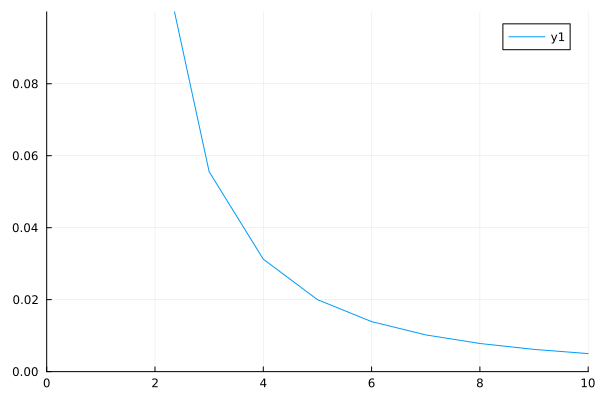

In [21]:
plot(Ns,deltalatt,xlim=(0,10),ylim=(0,0.1))

In [22]:
Ns=[N for N in 10:100]
deltamc=[(Fmc(N)-1) for N in Ns]

91-element Vector{Float64}:
 -0.005707537069648438
 -0.01778387460171671
 -0.0200205504919011
 -0.019773443244466504
  0.0017902921301642394
 -0.002046462757155587
 -0.004303716049291362
 -0.004418617613517584
  0.003622441412403976
  0.0003594457978646215
  ⋮
  4.936779404274283e-5
 -5.420886220497412e-5
  0.00037772579586059507
  2.4233640828486003e-5
  0.00044746564093167684
  0.0005817021524117116
  0.000791499059644929
 -0.0003800083688139111
  0.0006263943764781565

In [23]:
plot(Ns,deltamc)
plot!(Ns,deltalatt)

In [24]:
function sigma(N,M)
    F2=0
    F1=0
    for iM=1:M
        F=Fmc(N)
        F2+=F^2
        F1+=F
    end
    F2/=M
    F1/=M
    return sqrt(F2-F1^2)
end

sigma (generic function with 1 method)

In [25]:
Nmcs = [i for i in 1:100]
sigmas = [sigma(i,100) for i in Nmcs]

100-element Vector{Float64}:
 0.5886519966717343
 0.1738975015952427
 0.09541982922851018
 0.0597432669431937
 0.04213621815156091
 0.03912844970998122
 0.02452235360758043
 0.02342856677303612
 0.018175510090665314
 0.018759053200326118
 ⋮
 0.0006018953335039962
 0.0005385118648147024
 0.0005744763926536881
 0.0005867374412445468
 0.0005550126156467525
 0.0005079381461603536
 0.0005099098863208593
 0.0005477745299222206
 0.0004358473393120616

In [26]:
plot(Nmcs,sigmas,ylim=(0,0.01))
plot!(Ns,deltalatt,ylim=(0,0.01))